In [221]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20170521)
tf.set_random_seed(20170521)

In [222]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1','x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [7,7], 22, 0)
df1 = generate_datablock(15, [22,7], 22, 0)
df2 = generate_datablock(10, [7,22], 22, 0)
df3 = generate_datablock(25, [20,20], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df. reindex(permutation(df.index)).reset_index(drop=True)

In [223]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [224]:
num_units = 10
mult = train_x.flatten().mean()

x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1*mult)

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0*mult)

In [225]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [226]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x10eb5890>> ignored


In [227]:
i = 0
for _ in range(4000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 37.104675, Accuracy: 0.615385
Step: 200, Loss: 27.769638, Accuracy: 0.830769
Step: 300, Loss: 21.544859, Accuracy: 0.923077
Step: 400, Loss: 19.242115, Accuracy: 0.923077
Step: 500, Loss: 17.478498, Accuracy: 0.938462
Step: 600, Loss: 16.002857, Accuracy: 0.923077
Step: 700, Loss: 14.625329, Accuracy: 0.923077
Step: 800, Loss: 13.749343, Accuracy: 0.923077
Step: 900, Loss: 13.141710, Accuracy: 0.938462
Step: 1000, Loss: 12.700896, Accuracy: 0.938462
Step: 1100, Loss: 12.371408, Accuracy: 0.938462
Step: 1200, Loss: 12.117070, Accuracy: 0.938462
Step: 1300, Loss: 11.906420, Accuracy: 0.938462
Step: 1400, Loss: 11.731911, Accuracy: 0.938462
Step: 1500, Loss: 11.573263, Accuracy: 0.938462
Step: 1600, Loss: 11.366339, Accuracy: 0.938462
Step: 1700, Loss: 11.239789, Accuracy: 0.938462
Step: 1800, Loss: 11.153106, Accuracy: 0.938462
Step: 1900, Loss: 11.070038, Accuracy: 0.938462
Step: 2000, Loss: 10.982228, Accuracy: 0.938462
Step: 2100, Loss: 10.890866, Accuracy: 0.938462
S

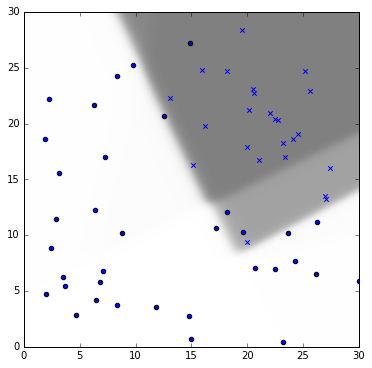

In [228]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = []
for x2 in np.linspace(0,30,100):
    for x1 in np.linspace(0,30,100):
        locations.append((x1,x2))
        
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(0,30,0,30), cmap=plt.cm.gray_r, alpha=0.5)